## GMIT Jon Ishaque G0030398244
## Programming for Data Analysis Project 2021
## An investigation into factors which may lead to alcoholism and simulation of a matching data set.

• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.

• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.

• Synthesise/simulate a data set as closely matching their properties as possible.

• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.

### Introduction
For this the real world phenonemon I have chose to investigate factors influencing the diaganosis of alcolholism. I will investigate a range of factors that may cause alcoholism and simulate a dataset from that.
The dataset will represent a simulated sample of subjects each of whom have been diagnosed as suffering from alcoholism. For each subject I will simulated a measure for the each given influecing factor, which follows a particular data distributin.

### 1. Investigation into factors that may cause alcoholism.
"There is no singular cause of alcoholism. In fact, there are dozens of risk factors that play a role in the development of an alcohol addiction. These risk factors interact differently in every individual, leading to alcohol use disorders in some and not in others." (Malibu, 2021)

### Factors that could contribute to alcoholims included:

### 1.1 Familial/genetic factors - i.e. social or biological inheritance. 
For example, one or more parent had alcoholism.

### 1.2  Age of diagnosis
Age is an impontant factor in the the idenficitaiton of alcolholism, the younger the subject the more likely they are to be be diagnosed with alcoholism. As alcohol is a known contributor to early death, the fall of the incidence of alcoholism in older age groups may well be  

<img align="center" src="age.PNG" width=400 >(NIAAA Publications, 2021)[1]

Addional to age of subject (when diagnosed) is age of subject when they first started drinking (Onset). Those closer to the age of 15 when they first start drinking are more likely to delvelop a harmful relationship with alcohol. The graphic below seems to illustrate a gamma distribution.

### 1.3  Age of onset of drinking
The following graphic (NIAAA Publications, 2021) suggests there is a inverse correlation between onset of drinking and likelihood of diagnosis (at a later age). There are two things to notice, the sudden jumpy in incidence between ages 18 and 19. I would propose that this caused by a far greater number of the sample actually taking up drinking at that age, due to either change in circumstances such as leaving home or a change in the legal drinkage in their locaiton. The other thing is that the graphic only shows onset ages of up to age 21 years. To simulate a data set all ages would need to be considered. 

<img align="center" src="onset1.PNG" width=400 >(NIAAA Publications, 2021)[2]

The next graphic does consider a wider age range of age of onset of drinking. It seems to confirm the very high likelihood of report of harmful drink after an early age start up until the mid-20 there after an ever continuing fall in the prevalence of harmful drink with a later 

<img align="center" src="onset.PNG" width=600 >(NIAAA Publications, 2021)[2]


### 1.4 Social class
Although people in higher social classes are known to be frequent and heavy drinkers they are less likely to be abusers of alcohol. It has been long observed that those in lower socio-economic classes are more likely to experience harm as a consquence of alcohol abuse. "Lower socioeconomic status (SES) is associated with higher mortality for
alcohol-attributable causes, despite lower socioeconomic groups often
reporting lower levels of consumption" (IAS, 2021)

The graphic below from the IAS indicates social econmomic class by level of deprivation - an index of derived from a range of indicators.
The graphic shows there is indeed a correlation between level of deprivation and prevalence of alcohol related hospital admissions. It also shows there is a difference in prevalence between males and females. The gradient of the change in of the five quintile is given which will help inform the simulated data generation.

<img align="center" src="Socio-eco.PNG" width=500 >(IAS, 2021)

In the above graphic gender is also shown and from the graphic it seems that regardless of gender social class is a greater overding factor in alcolholism

### 1.5  Gender

The graphic below suggests that males are more likely to be have higher incidences of heavy drinking than females. However, interestingly the graphic also show that after from the age 30-39 age group females are ever more less likley to have a high indicdence of alcohol consumption. Whilst with males from 20-29 the high incidence of drinking is more likey to rise until the 60-69 age group. This suggests that males are far more likley to be heavy drinkers than female and that that likelyhood increases until late middle age. 

<img align="center" src="gender.PNG" width=400 >(Shizumu etal, 2012)


Incidence of heavy drinkers with a daily consumption exceeded 40 g of ethanol per day for females and 60 g of ethanol per day for males based on data in 2002from theNational Nutrition Survey in Japan.
(Shizumu etal, 2012)
The above graphic shows two different distributions for males and females a skewed normal distribution for males and skewed right distribution for females.
In the US, of 14.5 million people with alcohol use disorder over the age of 12, 9 million were male and 5.5 milion were female (Alcohol Facts and Statistics | National Institute on Alcohol Abuse and Alcoholism (NIAAA), 2021)


### Generation of Simulated data
The variables which I will generate a sythesised data set of a sample of diagnosied alcoholics with the following variables:

- Age (of diagnosis)
- Age (of onset of alcohol consumptoin)
- Social Class
- Gender



In the first intance I will generate a series of numpy arrays for 1000 subjects for each of the variables I have chosen. I will then add each to a numpy array to a pandas dataframe which will give a sythesised sample with four variables where I have not allowed for the interplay between the variables.


In [1]:
#The following packages are used to create the simulated data sets
import scipy.special as sps 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#Create a pandas data frame with an array of IDs (separate to index)
ids =np.arange(1,1001) # create a list of ids
#add ids to dataset
df_dataset= pd.DataFrame(ids, columns=['id'])

seed = 11 
#set seed for RNG
rng = np.random.default_rng(seed) 

#### 2.1 Simulating Age of subject

The following block of code has been adapted from (Horvitz, 2021). It generates a simulated set of ages of initial diagnosis of alcoholism.  A gamma distribtuion and seems to fit the distribution  of (NIAAA Publications, 2021)[1], age of diagnosis of alcoholic related conditions. Although not an exact fit, the distribution produces ages of diagnosis where subjects are more likely to be diganosed in their early twenties.

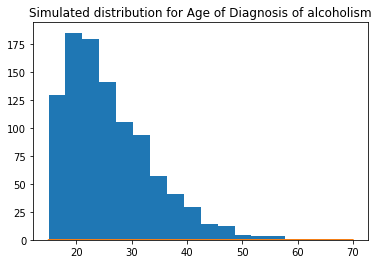

In [2]:
#from (Horvitz, 2021)

numValues = 1000
maxValue = 70# max age
minAge =15


#######
#add to dataset
#df_dataset['Age'] = ages
#print (df_dataset)
#check max and min values
#print(df_dataset['Age'].min())
#print(df_dataset['Age'].max())

shape, scale = 2.5, 2.  # mean=4, std=2*sqrt(2)
ages = np.random.gamma(shape, scale, 1000)
ages = ages - min(ages)      
ages = ages / max(ages)                         #Standadize all the values between 0 and 1. 
ages = ages * (maxValue-minAge)+minAge         #Multiply the standardized values by the maximum value.
ages = ages.astype(int)

 
count, bins, ignored = plt.hist(ages, 18, density=False)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.title("Simulated distribution for Age of Diagnosis of alcoholism")
plt.plot(bins, y)  
plt.show()

df_dataset['Age'] = ages
#print (df_dataset)

<img align="center" src="age.PNG" width=400 >(NIAAA Publications, 2021)[1]

#### 2.2 Simulating Age of onset of drinking

The distribution for the age of onset of drinking in diagnosed subjects seems to suggest very shallow exponential curve.
I will simulate and exponential data set with endpoints between agees 15 and 70.
I have adapted code from (Unknown, 2021)[1]


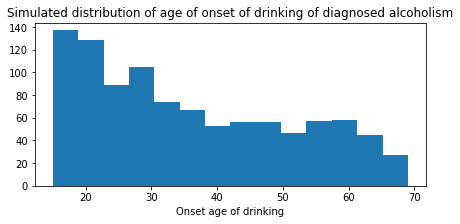

In [3]:
#set start and end points.
a = -np.log(15)
b = -np.log(70)
onsets = np.exp(-(np.random.rand(1000)*(b-a) + a))
#print (onsets)
#convert to integers
onsets=onsets.astype(int)
plt.rcParams['figure.figsize'] = [7, 3]
plt.xlabel('Onset age of drinking')
plt.hist(onsets, 14, density = False)
plt.title("Simulated distribution of age of onset of drinking of diagnosed alcoholism")
plt.show()

#######
#add to dataset
df_dataset['Onset'] = onsets
#print (df_dataset)
#Viewing the dataset it can be observed that there are diagnosis ages younger than onset age. This will require a rule



<img align="center" src="onset.PNG" width=600 >(NIAAA Publications, 2021)[2] example shown for comparison.

#### 2.3 Simulating Social Class of subjects

In [4]:
#f = np.array([1, 2, 4, 7, 11, 16], dtype=float)
#np.gradient(f)

<AxesSubplot:title={'center':'Simulated data from subject alochol diagnosis and Deprivation Index(males)'}, xlabel='Deprivation Quintile', ylabel='Freq'>

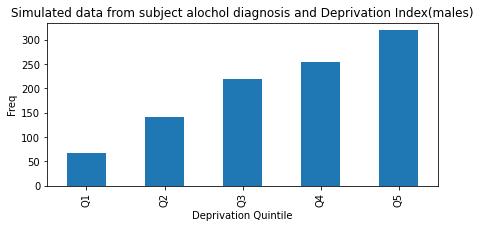

In [5]:

#set labels, 
arrDPQ = ['Q1','Q2','Q3','Q4','Q5']

'''Function to get the probabilty of x points from a given gradient'''

def getPforGrad(size,grad):
    arr =np.empty(size)
    gr = grad # gradient 
    i=0
    tot = 0    
    while i < size:
        num = gr *(i+1)
        arr[i] = num
        tot = tot + num    
        i=i+1   
    P = []
    i=0
    while i < size:
        num =  arr[i]/tot
        P.append(num) 
        i=i+1
    return P
#call get PforGrad with a size of 5 and gradient of 2.6
maleP=getPforGrad(5,2.6)

#print(maleP)
#Create an simulated dataset if male alcoholic diagnosis and their DP index
DPs= rng.choice(arrDPQ, 1000, replace=True, p=maleP)  

#plt.hist(DPs)
plt.title("Simulated data from subject alochol diagnosis and Deprivation Index(males)")
plt.xlabel("Deprivation Quintile")
plt.ylabel("Freq")
#use a pd plot to sort x axis.
pd.Series(DPs).value_counts().sort_index().plot(kind='bar')

The simulated data from subjec alcohol follows the gradient determined by (IAS, 2021)

In [6]:
##add the data to the dataset
df_dataset['DPindex'] = DPs
#print (df_dataset)


<img align="center" src="Socio-eco.PNG" width=500 >(IAS, 2021)

#### 2.4 Simulating gender of subjects
Graphics above illustrate that gender is dependent on age. For this reason, I will determine gender with age

People Ages 12 and Older: According to the 2019 NSDUH, 14.5 million (nearly 15 million) people ages 12 and older7 (5.3 percent of this age group8) had AUD. This number includes 9.0 million men7 (6.8 percent of men in this age group8) and 5.5 million women7 (3.9 percent of women in this age group8)



In [7]:
#probability for each gender
P_m = round(9/14.5,2)
P_f = round(5.5/14.5,2)

#choice method of random with M and F probabilities
gnd= rng.choice(['M','F'], 1000, replace=True, p=[P_m,P_f])  
##add the data to the dataset
df_dataset['gender'] = gnd
#x= rng.choice(['M','F'], 1, replace=True, p=[P_m,P_f])



#### 2.5 The simulated dataset.
Data has been simulated and for four variables and applied to the 1000 data subjects.
print (df_dataset)
However, the simulated data for each variable has been generated independently. It has already been shown there a relationship between the variables, for example the small but noticeible difference in the increase in alcohol abuse and with social deprivation and how it increase less for females than males. Onset of age of drinking cannot be greater than diagnosis and one would expect gap between the two. 




In [8]:
print(df_dataset)

       id  Age  Onset DPindex gender
0       1   30     28      Q2      F
1       2   19     27      Q4      M
2       3   17     16      Q4      M
3       4   37     28      Q1      M
4       5   19     25      Q2      M
..    ...  ...    ...     ...    ...
995   996   36     45      Q1      M
996   997   38     20      Q5      M
997   998   23     44      Q5      F
998   999   31     29      Q5      F
999  1000   24     60      Q4      M

[1000 rows x 5 columns]


#### 2.5 Simulating a dataset with variable working together
I will first look at determining the gender based on age and then deprivation index based on gender.
I will need to determine the probiblity of Male/Female in any agegroup and then apply this to function to set the gender based on age.
<img align="center" src="gender.PNG" width=400 >(Shizumu etal, 2012)


In [11]:

'''I have estimated the M/F probabilities based on the above graphic'''
A_f = 2.9/6.9 #WILD guess for less that 2-
A_m = 1 - A_f

B_f = 2.9/7.9 
B_m = 1 - B_f

C_f = 2.9/10.4
C_m = 1 - C_f

D_f = 2.8/13.3
D_m = 1 - D_f

E_f  =2.7/14.2
E_m = 1 - E_f

F_f = 1.8/9.6
F_m = 1 - F_f

G_f = .5/2
G_m = 1 - G_f



In [13]:
#Get DP probability for males and females
maleP=getPforGrad(5,2.6)
femaleP=getPforGrad(5,2.4)

'''The following loop interates through the dataframe, for each age category calls a random funcition to
set the gender based on P for that age group and then from gender it will determine the Deprivation Quintile for 
that subject''' 
for ind in df_dataset.index:
    
    #print(df_dataset['Age'][ind])
    A=int(df_dataset['Age'][ind])
    if  A < 20:
        g=rng.choice(['M','F'], 1, replace=True, p=[A_m,A_f]) 
        df_dataset.at[ind,'gender'] = g
        if g =='M':
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=maleP) 
        else:
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=femaleP)            
    
    elif A < 30:
        g=rng.choice(['M','F'], 1, replace=True, p=[B_m,B_f]) 
        df_dataset.at[ind,'gender'] = g
        if g =='M':
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=maleP) 
        else:
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=femaleP)              
    elif A < 40: 
        g=rng.choice(['M','F'], 1, replace=True, p=[C_m,C_f]) 
        df_dataset.at[ind,'gender'] = g
        if g =='M':
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=maleP) 
        else:
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=femaleP)  
    elif A < 50: 
        g=rng.choice(['M','F'], 1, replace=True, p=[D_m,D_f]) 
        df_dataset.at[ind,'gender'] = g
        if g =='M':
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=maleP) 
        else:
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=femaleP)  
    elif A < 60: 
        g=rng.choice(['M','F'], 1, replace=True, p=[E_m,E_f]) 
        df_dataset.at[ind,'gender'] = g
        if g =='M':
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=maleP) 
        else:
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=femaleP)  
    elif A < 70: 
        g=rng.choice(['M','F'], 1, replace=True, p=[F_m,F_f]) 
        df_dataset.at[ind,'gender'] = g
        if g =='M':
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=maleP) 
        else:
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=femaleP) 
    else:
        g=rng.choice(['M','F'], 1, replace=True, p=[G_m,G_f]) 
        df_dataset.at[ind,'gender'] = g
        if g =='M':
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=maleP) 
        else:
            df_dataset.at[ind,'DPindex'] =rng.choice(arrDPQ, 1, replace=True, p=femaleP)  
            



The data set now has some interplay between the variables. However, I have not been able to get the onset age greater than the start age. Because I use an exponential function on the whole series of onset age and also the whole series of diagnosis age, I am not able to work them together.

In [14]:
print (df_dataset)

       id  Age  Onset DPindex gender
0       1   30     28    [Q4]    [M]
1       2   19     27    [Q5]    [F]
2       3   17     16    [Q1]    [M]
3       4   37     28    [Q4]    [M]
4       5   19     25    [Q5]    [M]
..    ...  ...    ...     ...    ...
995   996   36     45    [Q3]    [M]
996   997   38     20    [Q4]    [F]
997   998   23     44    [Q1]    [M]
998   999   31     29    [Q1]    [M]
999  1000   24     60    [Q3]    [M]

[1000 rows x 5 columns]


#### Closing Remarks

1. My research on each variable drew on articles from different countries, the interaction between variale will be different in different countries. Ideally I would have found a dataset with all the variables I chose.
2. The research tells that patterns of drinking are constantly changing and particularly male and female relationships with alochol.


## References

Beard E, Brown J, West R, Kaner E, Meier P, Michie S (2019) Associations between socio-economic factors and alcohol consumption: A population survey of adults in England. PLoS ONE 14(2): e0209442. https://doi.org/10.1371/journal.pone.0209442 pmid:30716098

Drugsandalcohol.ie. 2021. [online] Available at: <https://www.drugsandalcohol.ie/25676/1/Understanding-the-relationship-between-poverty-and-alcohol-abuse-2.pdf> 

Euro.who.int. 2021. [online] Available at: <https://www.euro.who.int/__data/assets/pdf_file/0003/247629/Alcohol-and-Inequities.pdf> 

Horvitz, A., 2021. Create random numbers with left skewed probability distribution. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/24854965/create-random-numbers-with-left-skewed-probability-distribution> 

Ias.org.uk. 2021. [online] Available at: <https://www.ias.org.uk/uploads/pdf/IAS%20reports/IAS%20report%20Alcohol%20and%20health%20inequalities%20FULL.pdf>

Ichiro Shimizu, Mari Kamochi, Hideshi Yoshikawa and Yoshiyuki Nakayama (January 11th 2012). Gender Difference in Alcoholic Liver Disease, Trends in Alcoholic Liver Disease Research - Clinical and Scientific Aspects, Ichiro Shimizu, IntechOpen, DOI: 10.5772/27178. Available from: https://www.intechopen.com/chapters/25877

Malibu, O., 2021. Alcoholism Causes And Risk Factors. [online] Addiction Center. Available at: <https://www.addictioncenter.com/alcohol/alcoholism-causes-risk-factors/> .

Niaaa.nih.gov. 2022. Alcohol Facts and Statistics | National Institute on Alcohol Abuse and Alcoholism (NIAAA). [online] Available at: <https://www.niaaa.nih.gov/publications/brochures-and-fact-sheets/alcohol-facts-and-statistics> [Accessed 3 January 2022].

Pubs.niaaa.nih.gov. 2021. NIAAA Publications. [online] Available at: <https://pubs.niaaa.nih.gov/publications/aa74/aa74.htm>.

Pubs.niaaa.nih.gov. 2021. NIAAA Publications. [online] Available at: <https://pubs.niaaa.nih.gov/publications/arh40/29-44.htm> [2]



Unknown, 2021. How to generate random numbers at the tails of an exponential distribution?. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/69172510/how-to-generate-random-numbers-at-the-tails-of-an-exponential-distribution> [Accessed 30 December 2021].[1]